In [1]:
### Loading Credentials from local file; 
### this cell is meant to be deleted before publishing
import yaml

with open("../creds.yml", 'r') as ymlfile:
    cfg = yaml.safe_load(ymlfile)

uri = cfg["sonar_creds"]["uri"]
user = cfg["sonar_creds"]["user"]
password = cfg["sonar_creds"]["pass"]

# Project Summary 

[SoNAR (IDH)](https://sonar.fh-potsdam.de/) is short for **Interfaces to Data for Historical Social Network Analysis and Research**. The main objective of the project is the examination and evaluation of approaches to build and operate an advanced research technology environment supporting HNA. 

SoNAR (IDH) is a research project in collaboration of the following institutions:

* [Deutsches Forschungszentrum für Künstliche Intelligenz](https://www.dfki.de/)
* [Fachhochschule Potsdam](http://uclab.fh-potsdam.de/)
* [Humboldt-Universität zu Berlin](https://www.ibi.hu-berlin.de/)
* [Staatsbibliothek zu Berlin](https://staatsbibliothek-berlin.de/en/)
* [Heinrich-Heine-Universität Düsseldorf](https://www.uniklinik-duesseldorf.de/en/department-of-the-history-philosophy-and-ethics-of-medicine)


One of the main elements of the SonAR (IDH) projects is a [Neo4j](https://neo4j.com/) graph database. This database contains the merged data of multiple archives and libraries. 
See [Chapter 2](#Data-Description) for more details about the structure and the contents of the SonAR (IDH) database.

# Data Description


The SoNAR (IDH) database consists of nodes and edges. Each of the nodes and edges have additional properties that provide rich meta information. 

This data description section provides details about the data sources and overall characteristics of the data. The section is based on the state of the SoNAR (IDH) database during February 2021. 

More in depth details about the data, the database and the data preparation will get published soon. A diagram of the database schema can be found [here](https://camo.githubusercontent.com/9262db5eb53360acb5ccc2249ff97b4b7d82ee9199bdcb8563980f16b9d7cc95/68747470733a2f2f7472656c6c6f2d6174746163686d656e74732e73332e616d617a6f6e6177732e636f6d2f3564323530353865393136326235363762383630313439662f3565336331336262363037323836353631636335366635372f62646664383838363964376633656465616663366232633130326361666663342f556d6c4d6f64656c2e737667).


<div class="alert alert-block alert-info">
<b>Hint:</b> Nodes, edges and the respective properties where retrieved from different data sources. Edges of the type <code>SocialRelation</code> however, are implicit edges and were derived based on <code>Resources</code>.</div>

## Summary Stats

The SoNAR (IDH) database has the following aggregated characteristics:

**Nodes Summary**

* 9 categories of Nodes
* 34.511.952 Nodes

|Node Type | Node Count |
|---------------|------------|
| CorpName      | 1.487.711  |
| GeoName       | 308.197    |
| MeetName      | 814.044    |
| PerName       | 5.087.660  |
| TopicTerm     | 212.135    |
| UniTitle      | 385.300    |
| ChronTerm     | 537.054    |
| IsilTerm      | 611        |
| Resource      | 25.679.240 |

**Edges Summary**

* 10 categories of Edges
* 98.530.160 Edges


| Edge Type       | Edge Count     |
|---------------------|------------|
| RelationToPerName   | 14.630.465 |
| RelationToCorpName  | 5.099.190  |
| RelationToMeetName  | 263.180    |
| RelationToUniTitle  | 53.998     |
| RelationToTopicTerm | 4.951.617  |
| RelationToGeoName   | 5.140.556  |
| RelationToChronTerm | 5.446.841  |
| RelationToIsil      | 55.556.913 |
| RelationToResource  | 7.387.400  |
| SocialRelation      | 40.301.595 |

## Data Sources 

SoNAR (IDH) combines data from four different data sources. The table below provides a compact overview:


|Data Source |  Number of Nodes | Number of Edges <br>(incl. *RelationToIsilTerm*) |
|--------|----------| -------- |
|[GND (*Integrated Authority File*)](https://www.dnb.de/EN/Professionell/Standardisierung/GND/gnd_node.html)| 8.295.047 | 32.776.628 |
|[DNB (*German National Library*)](https://www.dnb.de/EN/Home/home_node.html)|19.384.733| 5.655.859 |
|[ZDB (*Zeitschriftendatenbank*)](https://www.zeitschriftendatenbank.de/startseite/)|1.908.334| 43.419.339 |
|KPE|4.386.173| 16.678.334 |


# Data Access

We will need some specific libraries to work with the SoNAR (IDH) database. Let's start with installing the `neo4j` library.

When you are using the curriculum on binder or by running it as a docker container locally, the package is already installed. When you want to interact with the SoNAR (IDH) database independently install the package with the following code line in a new notebook cell:

```python
!pip install neo4j
```

In [2]:
from neo4j import GraphDatabase

driver = GraphDatabase.driver(uri, auth=(user, password))

With the code above we create a [Neo4j driver object](https://neo4j.com/docs/api/python-driver/current/api.html#driver). This driver stores the connection details for the database. We can use this driver now to send requests to the database.

# Data Exploration

Data exploration is usually the very first thing to do when working with new data. So let's start diving into the SoNAR (IDH) database by exploring it. 

Whenever we want to retrieve data from the Neo4j database of SoNAR (IDH) we can use a query language called "**Cypher Query Language**". Cypher provides a comparably easy to comprehend syntax for requesting data from the database. Furthermore Cypher provides an extensive set of tools for applying graph algorithms, data science methods and data wrangling procedures. 

Throughout this curriculum we will use this Cypher Query Language whenever we directly retrieve data from SoNAR (IDH).
A more in-depth introduction to Cypher can be found [here](https://neo4j.com/docs/getting-started/current/cypher-intro/). More external resources are listed in the [Cypher summary chapter](#Summary-Cypher-Query-Language).

## Nodes

### Node Labels

Let's start off with a simple query. Let's request the database to return all [node labels](https://neo4j.com/docs/getting-started/current/graphdb-concepts/#graphdb-labels). Node labels are categories nodes can belong to. You can think of them as entity groups. The SoNAR (IDH) database distinguishes between persons, corporations and more. Let's ask the database to return all the labels available. 

In [16]:
with driver.session() as session:
    result = session.run("CALL db.labels()").data()
    
result

Failed to write data to connection IPv4Address(('h2918680.stratoserver.net', 7687)) (IPv4Address(('85.214.119.41', 7687))); ("32; 'Broken pipe'")
Failed to write data to connection IPv4Address(('h2918680.stratoserver.net', 7687)) (IPv4Address(('85.214.119.41', 7687))); ("32; 'Broken pipe'")


BrokenPipeError: [Errno 32] Broken pipe

**Code Breakdown:**

>The `with` statement is basically used to make the database call as resource effective and concise as possible. There are more advantages of the `with` call but their explanation would exceed the goal of this curriculum. However, an in-depth explanation of the `with` statement can be found [here](https://www.python.org/dev/peps/pep-0343/).
>
>When we request data from the database we need to establish a connection (`session`). The `driver` object we created earlier stores the connection details. When we use the method `driver.session()` we establish a new connection. This connection is assigned to the object `session` object for the `while` statement.
>
>The most relevant part of the code for retrieving the data is `"CALL db.labels()"`. This part is the actual Cypher query. The `CALL` clause is used to call the `db.labels()` procedure. More details about Neo4j procedures can be found below.
>
>The result of this code chunk is a list that contains a key-value pair (`dictionary`) per label in the database.  



<div class="alert alert-block alert-info">
<b>Hint:</b> Some parts of the pieces of code used in this curriculum might seem a little confusing for beginners. Most of the code chunks in this curriculum are written to work as "recipes" - even if you do not understand the code in every detail, you can easily adjust the code to your specific use case by doing small changes. 
Don't feel discouraged when you feel lost and just try to follow along the explanations. 
</div>

Some useful built-in procedures for exploring and describing the database are listed in the table below. You can get a full list of built-in procedures by using the following query: `CALL dbms.procedures()`


|Procedure | Description |
|---------|----------|
|`db.labels()`| List all labels in the database.|
|`db.propertyKeys()`|List all property keys in the database.|
|`db.relationshipTypes()`|List all relationship types in the database. |
|`db.schema()`| Show the schema of the data. |
|`db.stats.retrieve()`|Retrieve statistical data about the current database. <br>Valid sections are 'GRAPH COUNTS', 'TOKENS', 'QUERIES', 'META'|

**📝 Exercise**

Now, try one of the other methods listed in the table above by following the same procedure we used with the `db.labels()` call.

### Selecting Nodes

You can select nodes by using the `MATCH` statement. Cypher uses `ASCII-art` style syntax to define nodes, relationships and the direction of relationships in queries. 

Nodes are referred to by using parentheses `()`. Inside the parentheses you can define a node variable. This variable can be used to refer to a specific set of nodes throughout the rest of the query.

The example below matches any kind of node and assigns the variable name n `(n)`. We use the `LIMIT` statement to tell the database we only want to have the first 5 results. The number of results can drastically increase the response time of the database, so the `LIMIT` statement oftentimes can be handy if you want to test a query or if you suspect too many results. 

The `RETURN` statement defines what the database returns after your query was evaluated. You can be very specific in this statement in case you only want to retrieve certain aspects of the query results.

In [5]:
# define query
query = """
MATCH (n)
RETURN n
LIMIT 5
"""

# send query to database
with driver.session() as session:
    result = session.run(query).data()

# print result
result

[{'n': {'GenType': 'b',
   'DateOriginal': '1951-',
   'SpecType': 'kiz',
   'VariantName': 'CNS;;;CNS',
   'DateApproxBegin': '1951',
   'Id': '(DE-588)110-7',
   'id': 'Aut110_7',
   'Uri': 'http://d-nb.info/gnd/110-7',
   'Name': 'Congress of Neurological Surgeons'}},
 {'n': {'GenType': 'b',
   'Id': '(DE-588)191-0',
   'id': 'Aut191_0',
   'Uri': 'http://d-nb.info/gnd/191-0',
   'SubUnit': 'División de Ciencias Matemáticas, Médicas y de la Naturaleza',
   'Name': 'Consejo Superior de Investigaciones Científicas'}},
 {'n': {'GenType': 'b',
   'Id': '(DE-588)257-4',
   'id': 'Aut257_4',
   'SpecType': 'kiz',
   'Uri': 'http://d-nb.info/gnd/257-4',
   'Name': 'Fondazione Antonio Baselli'}},
 {'n': {'GenType': 'b',
   'Id': '(DE-588)273-2',
   'id': 'Aut273_2',
   'SpecType': 'wit',
   'Uri': 'http://d-nb.info/gnd/273-2',
   'Name': 'Copyright Law Symposium'}},
 {'n': {'GenType': 'b',
   'DateOriginal': '1865-',
   'VariantName': "Kornel'skii Universitet;;;Cornell Univ.;;;Universit

The output above is produced by calling the `.data()` method of the [Neo4j Python Driver](https://neo4j.com/docs/api/python-driver/current/api.html). This method returns the result of our query as a list of dictionaries. This result type is quite versatile since we can further manipulate the output to our liking by applying filters or transforming the result to different formats (e.g. Pandas data frame). 


<div class="alert alert-block alert-info">
    <b>Hint:</b> We are using triple quotes <code>""" ... """</code> for the query to tell Python we are writing a character string over multiple lines. We are doing this so the query looks tidy and well structured. You also could write the full query in one line - but this results in bad readability and makes debugging more difficult.
</div>

### Filtering Nodes

In the next step we want to apply filters inside the query so we have control over the nodes we retrieve from the database. 

The query below only returns one node of the type `PerName` without specifying which exact node we want to retrieve.

In [6]:
# define query
query = """
MATCH (n:PerName)
RETURN n
LIMIT 1"""

# send query to database
with driver.session() as session:
    result = session.run(query).data()

# print result    
result

[{'n': {'GenType': 'p',
   'VariantName': 'Lombez, Ambrosius de;;;La Peirie, Ambroise;;;LaPeirie, Ambroise;;;Ambroise;;;Lombez, Ambroise de;;;LaPeyrie;;;Lombez, Ambrosius von',
   'SpecType': 'piz',
   'Id': '(DE-588)100000096',
   'id': 'Aut100000096',
   'Uri': 'http://d-nb.info/gnd/100000096',
   'Name': 'Ambrosius'}}]

**Filtering Nodes by Properties**

Now, let's try to find a specific person. Let's try to find the node of Max Weber, the sociologist and political economist. 
We can define a filter based on properties of a node. The query below only returns nodes that have "Weber, Max" as `Name` property. The names in SoNAR are based on their GND entry and follow the order `name, first name`. You can check out GND entries on https://portal.dnb.de/.

We suspect the name "Weber, Max" to be not unique inside the big SoNAR (IDH) database. So we want to check, how many Max Webers we can find. For that, we return the count of nodes (`RETURN count(n)`) and not the actual nodes. 

In [7]:
query = """
MATCH (n:PerName {Name: 'Weber, Max'})
RETURN count(n)
"""

with driver.session() as session:
    result = session.run(query).data()
    
result

In fact we detected 34 hits in the database. So we need to apply more filters to find the correct Max.

Let's start by checking what properties are available for nodes of type `PerName`:

In [9]:
query = """
MATCH (n:PerName)
WITH LABELS(n) AS labels , KEYS(n) AS keys
UNWIND labels AS label
UNWIND keys AS key
RETURN DISTINCT label, COLLECT(DISTINCT key) AS props
ORDER BY label
"""

with driver.session() as session:
    result = session.run(query).data()
    
result

[{'label': 'PerName',
  'props': ['Uri',
   'Name',
   'Id',
   'VariantName',
   'id',
   'GenType',
   'SpecType',
   'DateStrictOriginal',
   'DateStrictEnd',
   'DateApproxOriginal',
   'DateApproxEnd',
   'DateStrictBegin',
   'Gender',
   'DateApproxBegin',
   'OldId']}]

Before we take a look at the output, let's talk about the query real quick:

In this query we use two Cypher list functions (`LABELS()` and `KEYS()`). These functions return a list of the element they are applied on (`KEYS(n)` returns all property names of the nodes captured in `n` as a list). The `UNWIND` clause 
is used to expand the created lists back to individual rows. Finally we match the distinct labels (we only include `PerName` nodes in this query) with a list of distinct properties that belong to `PerName` nodes.

Here you can find the documentation for the applied functions and clauses:

* [`LABELS()` & `KEYS()`](https://neo4j.com/docs/cypher-manual/current/functions/list/#functions-keys)
* [`UNWIND`](https://neo4j.com/docs/cypher-manual/current/clauses/unwind/)
* [`DIStINCT`](https://neo4j.com/docs/cypher-manual/current/clauses/return/#return-unique-results)
* [`COLLECT()`](https://neo4j.com/docs/cypher-manual/current/functions/aggregating/#functions-collect)

Now, let's take a look at the result:

We can see that there are several `date` properties for `PerName` nodes. The year of birth is stored in the property called `DateApproxBegin`. 
So let's apply a date filter. Let's assume we only know that Max Weber was born in the year 1864 and we want to filter based on this information.

In [10]:
query = """
MATCH (n:PerName)
WHERE n.Name = "Weber, Max" AND n.DateApproxBegin = "1864"
RETURN n
"""

with driver.session() as session:
    result = session.run(query).data()
    
result

[{'n': {'GenType': 'p',
   'DateApproxEnd': '1920',
   'DateStrictOriginal': '21.04.1864-14.06.1920',
   'VariantName': 'Makesi, Weipei;;;Weber, Karl Emil Maximilian;;;Veber, Maks;;;Veber, M.;;;Weibo, ...;;;Uēbā, Makkusu;;;Wibir, Māks;;;Weibo, Makesi;;;Fībir, Māks;;;Vēbā, Makkusu;;;Ma ke si Wei bo;;;Makesi-Weibo;;;馬克思, 威培;;;فيبر، ماكس;;;マックス・ウェーバー;;;马克斯•韦伯;;;ובר, מקס;;;韦伯, 马克斯',
   'SpecType': 'piz',
   'DateStrictBegin': '21.04.1864',
   'DateStrictEnd': '14.06.1920',
   'Gender': '1',
   'DateApproxOriginal': '1864-1920',
   'Uri': 'http://d-nb.info/gnd/118629743',
   'Name': 'Weber, Max',
   'DateApproxBegin': '1864',
   'Id': '(DE-588)118629743',
   'id': 'Aut118629743'}}]

In the query above we used a `WHERE` clause to apply a filter. You can define multiple conditions inside a filter, eg. by concatenating multiple logical conditions with `AND`, `OR` or `XOR`. See this [documentation page](https://neo4j.com/docs/cypher-manual/current/clauses/where/#boolean-operations) for more details.


As a last example, let's assume we only know that the last Name of Max Weber is spelled "韦伯" in Chinese, so we need to use this information as a filter. 

In the query result above, you see a node property called `VariantName`. This variable stores many alternative variants of the name we are looking for. So let's check how we could query the database by searching within this property by using the `CONTAINS` operator (click [here](https://neo4j.com/docs/cypher-manual/current/clauses/where/#match-string-contains) for more details):

In [11]:
query = """
MATCH (n:PerName)
WHERE n.VariantName CONTAINS "韦伯"
RETURN n
"""

with driver.session() as session:
    result = session.run(query).data()
    
result

[{'n': {'GenType': 'p',
   'DateApproxEnd': '1920',
   'DateStrictOriginal': '21.04.1864-14.06.1920',
   'VariantName': 'Makesi, Weipei;;;Weber, Karl Emil Maximilian;;;Veber, Maks;;;Veber, M.;;;Weibo, ...;;;Uēbā, Makkusu;;;Wibir, Māks;;;Weibo, Makesi;;;Fībir, Māks;;;Vēbā, Makkusu;;;Ma ke si Wei bo;;;Makesi-Weibo;;;馬克思, 威培;;;فيبر، ماكس;;;マックス・ウェーバー;;;马克斯•韦伯;;;ובר, מקס;;;韦伯, 马克斯',
   'SpecType': 'piz',
   'DateStrictBegin': '21.04.1864',
   'DateStrictEnd': '14.06.1920',
   'Gender': '1',
   'DateApproxOriginal': '1864-1920',
   'Uri': 'http://d-nb.info/gnd/118629743',
   'Name': 'Weber, Max',
   'DateApproxBegin': '1864',
   'Id': '(DE-588)118629743',
   'id': 'Aut118629743'}},
 {'n': {'GenType': 'p',
   'VariantName': 'Veber, Mattias;;;Weber, Matthias;;;Weibo, Madiyasi;;;Ma di ya si Wei bo;;;Madiyasi-Weibo;;;Ma ti ya si Wei bo;;;Matiyasi-Weibo;;;Weibo, Matiyasi;;;马蒂亚斯•韦伯;;;韦伯, 马蒂亚斯',
   'SpecType': 'piz',
   'DateApproxBegin': '1967',
   'Gender': '1',
   'DateApproxOriginal': 

<div class="alert alert-block alert-info">
    <b>Hint:</b> The most reliable way to select specific nodes of the SoNAR (IDH) database is by using the <code>Id</code> property. The <code>Id</code> property is a combination of the ISIL (International Standard Identifier for Libraries and Related Organisations) and the GND-ID. <br>
    The <code>Id</code> of Max Weber is <code>(DE-588)118629743</code>. <code>DE-588</code> is the ISIL code of the <a href="https://sigel.staatsbibliothek-berlin.de/suche/?isil=DE-588">GND (Gemeinsame Normdatei)</a> and <code>118629743</code> is the <a href="http://d-nb.info/gnd/118629743">GND-ID of Max Weber.</a>
</div>

## Relationships

### Relationships Types

Similar to node labels we can retrieve the categories of the relations inside the database. Every relation must have exactly one relationship type. This type defines the kind or category the relation belongs to. 

In [15]:
with driver.session() as session:
    result = session.run("CALL db.relationshipTypes()").data()

    
result

[{'relationshipType': 'RelationToIsilTerm'},
 {'relationshipType': 'RelationToChronTerm'},
 {'relationshipType': 'RelationToCorpName'},
 {'relationshipType': 'RelationToTopicTerm'},
 {'relationshipType': 'RelationToGeoName'},
 {'relationshipType': 'SocialRelation'},
 {'relationshipType': 'RelationToMeetName'},
 {'relationshipType': 'RelationToPerName'},
 {'relationshipType': 'RelationToUniTitle'},
 {'relationshipType': 'RelationToResource'}]

### Selecting Relationships

In the section about nodes we saw that we need to use parenthesis `()` to select nodes. When selecting relationships on the other hand we need to use brackets `[]` instead.

Additionally we can not solely query for plain relationships, but we need to define a pattern in which this relationship needs to appear in the database. 

The most simple relationship pattern we can define is: the relationship needs to be between any kind of two nodes. In the cypher language this would be expressed as:
>`()-[r]-()`


In [20]:
query = """
MATCH ()-[r]-()
RETURN r
LIMIT 5
"""

with driver.session() as session:
    result = session.run(query).data()

    
result

[{'r': ({}, 'RelationToCorpName', {})},
 {'r': ({}, 'RelationToCorpName', {})},
 {'r': ({}, 'RelationToCorpName', {})},
 {'r': ({}, 'RelationToCorpName', {})},
 {'r': ({}, 'RelationToCorpName', {})}]

### Filtering Relationships

You can filter relationships in a similar fashion like you can filter nodes. 
Let's retrieve relationships of the type `SocialRelation`.

In [21]:
query = """
MATCH ()-[r:SocialRelation]-()
RETURN r
LIMIT 5
"""

with driver.session() as session:
    result = session.run(query).data()

    
result

[{'r': ({}, 'SocialRelation', {})},
 {'r': ({}, 'SocialRelation', {})},
 {'r': ({}, 'SocialRelation', {})},
 {'r': ({}, 'SocialRelation', {})},
 {'r': ({}, 'SocialRelation', {})}]

This result is correct but the output is not very informative. Let's do some deeper exploration of the relationships.

**Filtering Relationships by Properties**

Just as nodes, relationships can have properties that provide meta information about the relation. Let's check the properties of the five relationships we retrieved above:

In [22]:
query = """
MATCH p = ()-[r:SocialRelation]-()
UNWIND relationships(p) as rel
RETURN properties(rel) as properties
LIMIT 5
"""

with driver.session() as session:
    result = session.run(query).data()

    
result

[{'properties': {'TypeAddInfo': 'undirected',
   'SourceType': 'associatedRelation',
   'Source': 'Bib(DE_588)5550944_7'}},
 {'properties': {'TypeAddInfo': 'undirected',
   'SourceType': 'associatedRelation',
   'Source': 'Bib(DE_588)5550944_7'}},
 {'properties': {'TypeAddInfo': 'undirected',
   'SourceType': 'associatedRelation',
   'Source': 'Bib(DE_588)16249939_5'}},
 {'properties': {'TypeAddInfo': 'undirected',
   'SourceType': 'associatedRelation',
   'Source': 'Bib(DE_588)16249939_5'}},
 {'properties': {'TypeAddInfo': 'undirected',
   'SourceType': 'associatedRelation',
   'Source': 'BibBVBBV044242543'}}]

As we can see, the properties of relationships of the type `SocialRelation` have three different elements: 

* `TypeAddInfo` - either **directed** or **undirected**
* `SourceType` - can take the values: **associatedRelation**, **areCoAuthors**, **areCoEditors**, **affiliatedRelation**, **correspondedRelation**, **knows**
* `Source` - **id** of the source


<div class="alert alert-block alert-info">
    <b>Hint:</b> As mentioned earlier, <code>SocialRelation</code>-nodes are derived from <code>Resource</code>-nodes. The <code>Source</code> property of a <code>SocialRelation</code> is the <code>id</code> of the corresponding <code>Resource</code>
</div>

Let's use the properties to filter out people that are connected to each other because they had a **correspondence** with each other.

In [18]:
# in the RETURN clause we define specifically what elements we want to retrieve, this way the output is easier to read
query = """
MATCH (n1:PerName)-[r:SocialRelation]-(n2:PerName)
WHERE r.SourceType = "correspondedRelation"
RETURN n1.Name, n2.Name, r.SourceType, r.TypeAddInfo
LIMIT 5
"""

with driver.session() as session:
    result = session.run(query).data()

    
result

[{'n1.Name': 'André, Christian Carl',
  'n2.Name': 'Richter, Karl Friedrich Enoch',
  'r.SourceType': 'correspondedRelation',
  'r.TypeAddInfo': 'directed'},
 {'n1.Name': 'André, Christian Carl',
  'n2.Name': 'Hügel, Elisabeth von',
  'r.SourceType': 'correspondedRelation',
  'r.TypeAddInfo': 'directed'},
 {'n1.Name': 'André, Christian Carl',
  'n2.Name': 'Sturm, Karl Christian Gottlob',
  'r.SourceType': 'correspondedRelation',
  'r.TypeAddInfo': 'directed'},
 {'n1.Name': 'Ring, Friedrich Dominicus',
  'n2.Name': 'Pfeffel, Gottlieb Konrad',
  'r.SourceType': 'correspondedRelation',
  'r.TypeAddInfo': 'directed'},
 {'n1.Name': 'Bothe, Friedrich Heinrich',
  'n2.Name': 'Hauff, Hermann',
  'r.SourceType': 'correspondedRelation',
  'r.TypeAddInfo': 'directed'}]

We can see that all of these relationships have a `TypeAddInfo` of **directed**. Relationships can be directed and undirected. In the SoNAR (IDH) database all correspondences are directed and therefor hold the information whether someone was contacted or contacted someone else. 

Let's see who received letters from Max Weber. The query below extends the basic `()-[]-()` structure for representing a node-relationship search pattern by an `>`. This arrow defines that we are searching only for directed relationships. So the new pattern scaffolding is `()-[]->()`

In [24]:
query = """
MATCH (n1:PerName)-[r:SocialRelation]->(n2:PerName)
WHERE n1.Name = "Weber, Max" AND n1.DateApproxBegin = "1864" 
AND r.SourceType = "correspondedRelation"
RETURN n1.Name, n2.Name, r.SourceType, r.TypeAddInfo
"""

with driver.session() as session:
    result = session.run(query).data()
    
result

[{'n1.Name': 'Weber, Max',
  'n2.Name': 'Lukács, Georg',
  'r.SourceType': 'correspondedRelation',
  'r.TypeAddInfo': 'directed'},
 {'n1.Name': 'Weber, Max',
  'n2.Name': 'Susman, Margarete',
  'r.SourceType': 'correspondedRelation',
  'r.TypeAddInfo': 'directed'},
 {'n1.Name': 'Weber, Max',
  'n2.Name': 'Wolfskehl, Karl',
  'r.SourceType': 'correspondedRelation',
  'r.TypeAddInfo': 'directed'},
 {'n1.Name': 'Weber, Max',
  'n2.Name': 'Jaspers, Karl',
  'r.SourceType': 'correspondedRelation',
  'r.TypeAddInfo': 'directed'},
 {'n1.Name': 'Weber, Max',
  'n2.Name': 'Jaffe, Else',
  'r.SourceType': 'correspondedRelation',
  'r.TypeAddInfo': 'directed'},
 {'n1.Name': 'Weber, Max',
  'n2.Name': 'Ernst, Paul',
  'r.SourceType': 'correspondedRelation',
  'r.TypeAddInfo': 'directed'},
 {'n1.Name': 'Weber, Max',
  'n2.Name': 'Diederichs, Eugen',
  'r.SourceType': 'correspondedRelation',
  'r.TypeAddInfo': 'directed'}]

So far we only focused on retrieving textual outputs from our queries. But of course we can visualize networks too. The code block below gives a quick example of how we can visualize the query output as a network. 

In the code below we are going to use a custom written function. This function is stored in another python file and hence we can load it as if it would be an own library. You can find a more in-depth explanation on the steps below in the chapter [Complex Queries & Data Preparation](#Complex-Queries-&-Data-Preparation).

The query below is an extension of the query we just used. We check out the network of people Max Weber corresponded with but we also take a look into the second degree of the same relationships. So we also check, the correspondences of the people Max Weber corresponded with. 

In [45]:
#the line below loads in the custom function "to_nx_graph()". See chapter 6 for more details. 
from helper_functions.helper_fun import to_nx_graph

driver = GraphDatabase.driver(uri, auth=(user, password))

query = """
MATCH (n1:PerName)-[r:SocialRelation]->(n2:PerName)-[r2:SocialRelation]->(n3:PerName)
WHERE n1.Id = "(DE-588)118629743" AND r.SourceType = "correspondedRelation" AND r2.SourceType = "correspondedRelation"
RETURN *
"""

G = to_nx_graph(neo4j_driver = driver, 
                query = query)

In [46]:
# we are using the pyvis library for the interactive network visualization 
from pyvis.network import Network

# At first we define some basic details about the network, like width and hight.
nt = Network('750px', '100%', notebook=True)

# After that we tell pyvis to create a network from the graph object "G"
nt.from_nx(G)

# Finally we use the "show" function. Pyvis creates a html file conatining the network 
# and embeds the result below the cell.
nt.show('./html_networks/weber_network.html')

## Summary Cypher Query Language

In this section about data exploration we took a quick look into the very basics of the **Cypher Query Language**. Whenever you want to retrieve data directly from the SoNAR (IDH) database, you need to write a Cypher query.

A full introduction into this query language would exceed the scope of this curriculum. But the list below provides an overview of good resources for digging deeper into Cypher:

* [A quick introduction to Cypher basics by Neo4J](https://neo4j.com/docs/getting-started/current/cypher-intro/)
* [The official Neo4j Cypher manual](https://neo4j.com/docs/cypher-manual/current/)
* [The Cypher Query Language Developer Guide](https://neo4j.com/developer/cypher/)
* [Free Online Courses by the Neo4j GraphAcademy](https://neo4j.com/graphacademy/#_take_a_free_course)


The upcoming sections of this curriculum also heavily relies on Cypher, but there won't be any detailed explanation of specific clauses and commands. You can see these cells as code recipes. You can check out the aforementioned resources for a documentation of the applied Cypher clauses. 

# Descriptive Analyses

## General Database Summaries

We can also aggregate values and do more complex calculations with Cypher. Let's create a summary of how many **Nodes**, **Relationships**, **Node Labels** and **Relationship Types** are inside the database.

In [25]:
query = """
MATCH (n) 
RETURN 'Number of Nodes: ' + count(n) as output 
UNION
MATCH ()-[]->() 
RETURN 'Number of Relationships: ' + count(*) as output 
UNION
CALL db.labels() YIELD label 
RETURN 'Number of Labels: ' + count(*) AS output 
UNION
CALL db.relationshipTypes() YIELD relationshipType  
RETURN 'Number of Relationship Types: ' + count(*) AS output
"""

with driver.session() as session:
    result = session.run(query).data()
    
result


[{'output': 'Number of Nodes: 46831805'},
 {'output': 'Number of Relationships: 191363660'},
 {'output': 'Number of Labels: 9'},
 {'output': 'Number of Relationship Types: 10'}]

### Summarise Node Labels

In the next code cell we calculate the count of each node category in the database.

In [33]:
query = """
MATCH (n)
RETURN DISTINCT COUNT(LABELS(n)) AS count, LABELS(n) AS label
ORDER BY count
"""

with driver.session() as session:
    result = session.run(query).data()
    
result

[{'count': 611, 'label': ['IsilTerm']},
 {'count': 212135, 'label': ['TopicTerm']},
 {'count': 308197, 'label': ['GeoName']},
 {'count': 385300, 'label': ['UniTitle']},
 {'count': 537054, 'label': ['ChronTerm']},
 {'count': 814044, 'label': ['MeetName']},
 {'count': 1487711, 'label': ['CorpName']},
 {'count': 5087660, 'label': ['PerName']},
 {'count': 37999093, 'label': ['Resource']}]

### Summarise Relationship Types


We can do the same count calculation for relationship types too. However, the query below uses a slightly different logic to retrieve the count per relationship type than the query we applied on the nodes above.

The query below calls the procedure `db.relationshipTypes()` to retrieve a list of all relationship types in the database. Afterwards we use a procedure called `apoc.cypher.run()`. This procedure can be used to execute a Cypher query per row. We use this procedure to run the the `count` function for each type retrieved from `db.relationshipTypes()`. 

This way of writing the query is a lot faster than the way we used above in section [Summarise Node Labels](#Summarise-Node-Labels).

In [37]:
query = """
CALL db.relationshipTypes() YIELD relationshipType as type
CALL apoc.cypher.run('MATCH ()-[:`'+type+'`]->() RETURN count(*) as count',{}) YIELD value
RETURN type, value.count AS count
ORDER BY count
"""


with driver.session() as session:
    result = session.run(query).data()
    
result

[{'type': 'RelationToUniTitle', 'count': 128256},
 {'type': 'RelationToMeetName', 'count': 422333},
 {'type': 'RelationToChronTerm', 'count': 5446841},
 {'type': 'RelationToCorpName', 'count': 6728127},
 {'type': 'RelationToGeoName', 'count': 6861379},
 {'type': 'RelationToResource', 'count': 7389423},
 {'type': 'RelationToPerName', 'count': 20857782},
 {'type': 'RelationToTopicTerm', 'count': 24068056},
 {'type': 'SocialRelation', 'count': 40301595},
 {'type': 'RelationToIsilTerm', 'count': 79159868}]

We also can easily create a plot using the result we just generated. The code block below uses pandas to convert the result we got in the code block above into a dataframe. Furthermore we use the Pandas method `plot.bar` to create a bar plot. More details on the method `plot.bar`can be found [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html).


<AxesSubplot:xlabel='type'>

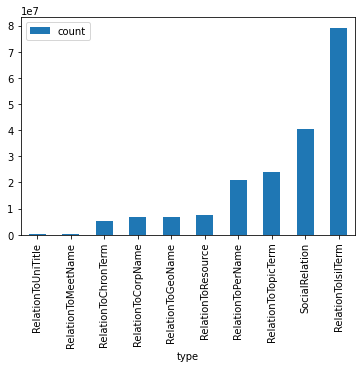

In [40]:
import pandas as pd

pd.DataFrame(result).plot.bar(x = "type", y = "count")

## Graph Analyses & Algorithms

### Degree Centrality

Centrality algorithms can be used to uncover the roles and importance of nodes in a network. There are many different ways to measure the centrality of a node. The example below uses the **Degree Centrality** as one of the simplest centrality measures. (Needham & Hodler, 2019)

Degree centrality simply counts the number of incoming and outgoing relationships from a node. Degree centrality was introduced by Freeman in his paper "Centrality in social networks conceptual clarification" (1979).


The example below calculates the number of `SocialRelation` for `PerName` nodes and returns the top 10 people with the most social relationships in the SoNAR (IDH) database.

More information about Cypher based centrality procedures can be found [here](https://neo4j.com/docs/graph-data-science/current/algorithms/centrality/).

In [35]:
# In the query below we use the build-in degree centrality procedure of Neo4j. 
# We define a "node projection" and a "relationship projection", to narrow down the degree centrality calculation
# to a specific subset of nodes and edges. 
# More details can be found by following the link mentioned in the text above.
query = """
CALL gds.alpha.degree.stream({
    nodeProjection: "PerName",
    relationshipProjection: "SocialRelation"
})
YIELD nodeId, score
RETURN gds.util.asNode(nodeId).Name AS Name, score
ORDER BY score DESC
LIMIT 10
"""

with driver.session() as session:
    result = session.run(query).data()


result

[{'Name': 'Unseld, Siegfried', 'score': 143347.0},
 {'Name': 'Zeeh, Burgel', 'score': 76720.0},
 {'Name': 'Ritzerfeld, Helene', 'score': 64609.0},
 {'Name': 'Böttiger, Carl August', 'score': 47762.0},
 {'Name': 'Höllerer, Walter', 'score': 45616.0},
 {'Name': 'Mozart, Wolfgang Amadeus', 'score': 42590.0},
 {'Name': 'Hauptmann, Gerhart', 'score': 37309.0},
 {'Name': 'Goethe, Johann Wolfgang von', 'score': 36265.0},
 {'Name': 'Francke, Gotthilf August', 'score': 35440.0},
 {'Name': 'Johnson, Uwe', 'score': 35068.0}]

### Shortest Path

As shown in notebook 2, we can conduct a path finding algorithm to find the shortest path between two nodes. The shortest path algorithm can take weighted relationships into account and is widely applied in navigation systems.

Furthermore the detection of shortest paths can provide insights about how close people are to each other and how similar they might be to each other or if they share something in common. (Needham & Hodler, 2019)

The example below shows the calculation of the shortest path between John Hume (`(DE-588)119444666`) and Marie Curie (`(DE-588)118523023`). Also we define a `nodeProjection` and a `relationshipProjection`. These projections are arguments you can use inside the shortest path procedure to define specific properties and characteristics of the nodes and relationships you want to consider for the shortest path calculation. 


More information on the Cypher shortest path finding algorithm and the projections can be found [here](https://neo4j.com/docs/graph-data-science/1.4/alpha-algorithms/shortest-path/).

In [4]:
query = """
MATCH (start:PerName {Id: "(DE-588)119444666"}),
      (end:PerName {Id: "(DE-588)118523023"})

CALL gds.alpha.shortestPath.stream({
    startNode: start,
    endNode: end,
    nodeProjection: {type: "PerName"},
    relationshipProjection: {
    all: {
        type: "SocialRelation",
        orientation: "NATURAL",
        TypeAddInfo: "directed",
        SourceType: "correspondedRelation"
    }
}})

YIELD nodeId, cost
RETURN gds.util.asNode(nodeId).Name AS Name
"""

with driver.session() as session:
    result = session.run(query).data()


result

[{'Name': 'Hume, John'},
 {'Name': 'Annan, Kofi A.'},
 {'Name': 'Fischer, Joschka'},
 {'Name': 'Bereska, Henryk'},
 {'Name': 'Skłodowska-Curie, Marie'}]

# Complex Queries & Data Preparation

In this last chapter of notebook 3 we want to take a look into more complex queries and data processing procedures. The queries in this chapter use concepts and functionalities of the Cypher query language we did not use so far. As mentioned earlier there won't be an in-depth explanation of how the queries are working but there will be links to the documentation of the most important parts. 

## Analyse Works And Resources by Genre in a Time Range

For the query below we want to retrieve all resources (`Resource`) and related works (`UniTitle`). Furthermore we  apply a temporal filter, so we only retrieve resources and works created in a given time span.

In [2]:
from neo4j import GraphDatabase
import networkx as nx

driver = GraphDatabase.driver(uri, auth=(user, password))

from_year = "1900"
to_year = "1925"

date_pattern = "([0-9]{4})" # this is a RegEx pattern that defines a 4 digit year pattern (eg. "1800")

# query scaffolding with placeholders
query = """
MATCH (n:UniTitle)-[r]-(m:Resource)
WHERE m.DateApproxBegin =~ "{date_pattern}"
    AND toInteger(m.DateApproxBegin) >= toInteger({from_year}) 
    AND toInteger(m.DateApproxBegin) <= toInteger({to_year}) 
RETURN *
"""

# replace placeholders in query sccaffolding
query = query.format(from_year=from_year, 
                     to_year=to_year,
                     date_pattern = date_pattern)

The query above uses the following elements to construct the database request:

 - **Regular Expressions** are used to select only correct year formats. Click [here](https://neo4j.com/docs/cypher-manual/current/clauses/where/#matching-using-regular-expressions) for more details on matching with Cypher using regular expressions.
 
 - **Scalar Functions** to convert string values to integer values. Click [here](https://neo4j.com/docs/cypher-manual/current/functions/scalar/#functions-tointeger) for more details.
 - The **Python string format() method** to replace placeholders inside a character string in Python. Click [here](https://www.w3schools.com/python/ref_string_format.asp) for more details.

In the next step, we use a custom function to process the query. We import a function called `to_nx_graph()`. This function is helping us to keep the code slim and clean. The function itself is doing things we did several times before already:

On the one hand it sends the query to the SoNAR (DH) database and ingests the databases reply. 
On the other hand the function generates a `networkx` Graph object from the returned data. This process is similar to the one used in the chapter "Case Study: Nobel Laureates" in notebook 2. 

Click [here](../notebooks/helper_functions/helper_fun.py) to see the source code of this helper function.

In [3]:
from helper_functions.helper_fun import to_nx_graph

G = to_nx_graph(neo4j_driver = driver, 
                query = query)

This graph object can easily be converted to a data frame and analyzed as tabular data. 

In [37]:
import pandas as pd
graph_df = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')
graph_df["type"].value_counts()

Resource    905
UniTitle    363
Name: type, dtype: int64

In the next step we prepare the visualisation of the graph. We can define different colors for the nodes. Let's color the nodes by their type. 

In [38]:
type_list = []
for node in list(G.nodes):
    type_list.append(G.nodes[node]["type"])
    
color_map = {"Resource": "red", "UniTitle": "green"}

color_dict = dict(zip(list(G.nodes), [color_map.get(item, item) for item in type_list]))

nx.set_node_attributes(G, color_dict, "color")

Now, we visualise the Graph inside the Jupyter Notebook using the [`pyvis` package](https://pyvis.readthedocs.io/en/latest/index.html).

In [40]:
from pyvis.network import Network

nt = Network('750', '100%', notebook=True)
nt.repulsion()
nt.from_nx(G)
nt.show('./html_networks/works_in_time_range.html')

## Analyse Persons by TopicTerm and Time Range

The following example is about analysing persons based on a specific topic term and whether the person was alive during a given time period. 

The query below filters people that were Sociologists and were alive between January 1st, 1900 and January 1st, 1925. Furthermore the query retrieves all connected resources of the persons that meet the filter criteria. 

In [24]:
from neo4j import GraphDatabase
import networkx as nx

driver = GraphDatabase.driver(uri, auth=(user, password))

from_date = "1900-01-01"
to_date = "1925-01-01"
topic_term = "Soziolog"

date_pattern = "([0-9]{2}[.][0-9]{2}[.][0-9]{4})"

# query scaffolding with placeholders
query = """
MATCH (n:PerName)-[r1]-(t:TopicTerm), 
      (n:PerName)-[r2]-(m:Resource)
WHERE n.DateStrictBegin =~ '{date_pattern}' AND n.DateStrictEnd  =~ '{date_pattern}' AND
    t.Name CONTAINS "{topic_term}"
WITH apoc.date.parse(n.DateStrictBegin, "ms", "dd.MM.yyyy") AS parsed_birth, 
    apoc.date.parse(n.DateStrictEnd, "ms", "dd.MM.yyyy") AS parsed_death, 
    n, m, t, r1, r2
WHERE apoc.coll.max([date(datetime({{epochmillis: parsed_birth}})), date("{from_date}")]) <= apoc.coll.min([date(datetime({{epochmillis: parsed_death}})), date("{to_date}")]) 
RETURN *
LIMIT 2000
"""

# replace placeholders in query scaffolding
query = query.format(from_date=from_date, 
                     to_date=to_date, 
                     date_pattern = date_pattern,
                    topic_term = topic_term)

The query above uses the following new elements to construct the database request:

- APOC procedures are used to parse actual date and time variables. APOC procedures are predefined Cypher functions that make processing data easier. A full user guide for the build-in APOC procedures can be found [here](https://neo4j.com/labs/apoc/4.1/). An introduction to working with dates using the Cypher language can be found [here](https://neo4j.com/developer/cypher/dates-datetimes-durations/).
- The Cypher `WITH` clause is used to chain together new variables with the rest of the query. More details on the `WITH` clause can be found [here](https://neo4j.com/docs/cypher-manual/current/clauses/with/)

In the next step we call the custom function `to_nx_graph()` again and convert the graph to a data frame.

In [25]:
from helper_functions.helper_fun import to_nx_graph

G = to_nx_graph(neo4j_driver = driver, 
                query = query)

In [26]:
import pandas as pd
graph_df = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')
graph_df["type"].value_counts()

Resource     1980
PerName       126
TopicTerm       1
Name: type, dtype: int64

**Aggregate by Time Period**

Let's use the pandas dataframe to aggregate the retrieved data. 

<AxesSubplot:xlabel='clean_date'>

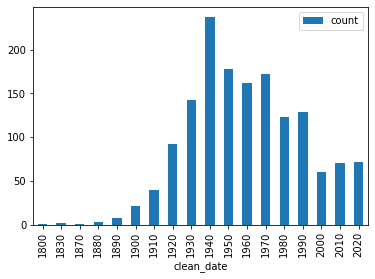

In [100]:
time_range = "10y" # change this value to the year range you want to use as a aggregation period (e.g. "10y" for ten years)

### cleaning up the dataframe
# only keep observations with a valid year as "DateApproxBegin"
agg_df = graph_df[graph_df.DateApproxBegin.str.fullmatch("([0-9]{4})", na=False)]
# only keep Resources and drop all other node types
agg_df = agg_df[agg_df.type == "Resource"]
# add a new column called "clean_date" to the dataframe containing a corectly formated date format
agg_df.insert(0, "clean_date", pd.to_datetime(agg_df.DateApproxBegin, format="%Y"), False)

### aggregate the data
# aggregate by the given time range and calculate the number of observations in the time period per node type
agg_df = agg_df.groupby(["type", pd.Grouper(key = "clean_date", freq = time_range)])["type"].agg("count")
# reset the grouping index so we have a "normal" dataframe again
agg_df = agg_df.reset_index(name= "count")

### plot the result
# replace the full "clean_date" values with only the string of the respective ending year of the time period
agg_df["clean_date"] = agg_df["clean_date"].dt.strftime("%Y")
# plot a bar chart 
agg_df.plot.bar(x = "clean_date", y = "count")

**Visualize the network** 

In [101]:
type_list = []
for node in list(G.nodes):
    type_list.append(G.nodes[node]["type"])
    
color_map = {"Resource": "red", "TopicTerm": "green", "PerName": "yellow"}

color_dict = dict(zip(list(G.nodes), [color_map.get(item, item) for item in type_list]))

nx.set_node_attributes(G, color_dict, "color")

In [102]:
from pyvis.network import Network

nt = Network('750px', '100%', notebook=True)
nt.from_nx(G)
nt.repulsion()
nt.show('./html_networks/person_by_topic.html')

## Retrieve a complex Person centered Network

The last example uses the same procedures as before. This time a complex network that is centered around one person is retrieved. The GND-ID can be used to filter for a specific person. The example below uses the GND-ID of [Nathan Zuntz](https://portal.dnb.de/opac.htm?method=moveDown&currentResultId=%22118896202%22%26any&categoryId=persons).

In [69]:
from neo4j import GraphDatabase
import networkx as nx

driver = GraphDatabase.driver(uri, auth=(user, password))

gnd_id = "(DE-588)118896202"

query = """
MATCH (main_node:PerName {{Id: "{gnd_id}"}})-[r1:RelationToPerName]-(friends)-[r2:RelationToPerName]-(friends_friends),
 (main_node:PerName {{Id: "{gnd_id}"}})-[r3]-(corps:CorpName)
RETURN *
"""

# replace placeholders in query scaffolding
query = query.format(gnd_id = gnd_id)

In [70]:
from helper_functions.helper_fun import to_nx_graph

G = to_nx_graph(neo4j_driver = driver, 
                query = query)

In [71]:
import pandas as pd
graph_df = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')
graph_df["type"].value_counts()

PerName     142
Resource    132
CorpName     15
Name: type, dtype: int64

In [72]:
type_list = []
for node in list(G.nodes):
    type_list.append(G.nodes[node]["type"])
    
color_map = {"PerName": "red", "CorpName": "blue", "Resource": "green"}

color_dict = dict(zip(list(G.nodes), [color_map.get(item, item) for item in type_list]))

nx.set_node_attributes(G, color_dict, "color")

In [73]:
from pyvis.network import Network

nt = Network('750px', '100%', notebook=True)
nt.from_nx(G)
nt.show('./html_networks/person_centered_net.html')

# Bibliography

Freeman, L. C. (1978). Centrality in social networks conceptual clarification. Social Networks, 1(3), 215–239. https://doi.org/10.1016/0378-8733(78)90021-7

Needham, M. & Hodler, A. (2019). Graph algorithms : practical examples in Apache Spark and Neo4j. Beijing: O'Reilly.